## Generating one-step-ahead predictions : Task in this exercise is to attempt the impossible and predict the Amazon stock price

In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy  as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
amazon = pd.read_csv('amazon_close.csv', index_col = 'date', parse_dates=True)

In [4]:
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


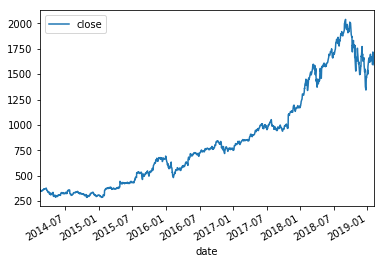

In [34]:
# plot
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

### Run Dicky-fuller test

In [35]:
results = adfuller(amazon['close'])
print('test statistics ->', results[0])
print('p value ->', results[1])

test statistics -> -1.344669096532606
p value -> 0.6084966311408375


In [36]:
# amazon_stationary = amazon['close'].diff().dropna()
# amazon_stationary.head()

date
2019-02-07    26.15
2019-02-06    25.89
2019-02-05    18.55
2019-02-04   -25.50
2019-02-01    -7.08
Name: close, dtype: float64

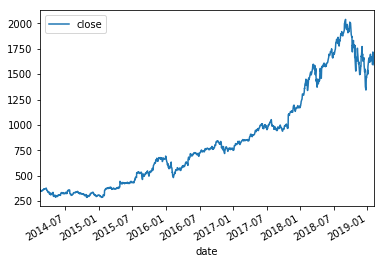

In [44]:
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

In [45]:
# results = adfuller(amazon_stationary)
# print('test statistics ->', results[0])
# print('p value ->', results[1])

In [46]:
model = SARIMAX(amazon, order=(1, 1, 1), trend = 'c')
result = model.fit()
# generate predictions
one_step_forecast = result.get_prediction(start = -30)

# extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# get confidence interval of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

print(mean_forecast)

C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


date
2014-03-24    352.751444
2014-03-21    350.089899
2014-03-20    358.640927
2014-03-19    366.816607
2014-03-18    371.063683
2014-03-17    376.549671
2014-03-14    373.083834
2014-03-13    371.929681
2014-03-12    369.856325
2014-03-11    369.075522
2014-03-10    367.364098
2014-03-07    369.049223
2014-03-06    370.563854
2014-03-05    370.698550
2014-03-04    370.934714
2014-03-03    362.778087
2014-02-28    358.781934
2014-02-27    360.992686
2014-02-26    359.072448
2014-02-25    358.730307
2014-02-24    357.278397
2014-02-21    350.932122
2014-02-20    346.027860
2014-02-19    348.897351
2014-02-18    346.513613
2014-02-14    352.523615
2014-02-13    356.086043
2014-02-12    355.946693
2014-02-11    348.267228
2014-02-10    360.353379
dtype: float64


## Plotting one-step-ahead predictions

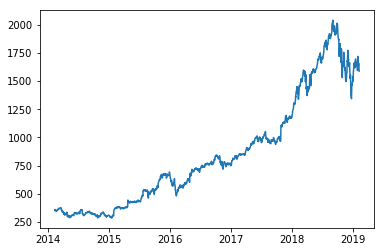

In [43]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

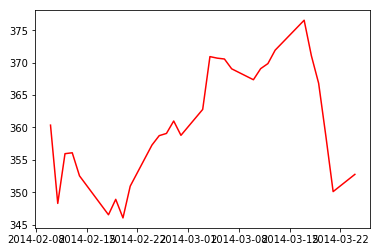

In [47]:
# plot the mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

No handles with labels found to put in legend.


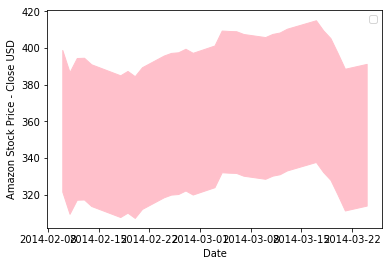

In [49]:
# shade the area between your confidence limits
plt.fill_between(confidence_intervals.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts

What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

It is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [50]:
dynamic_forecast = result.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

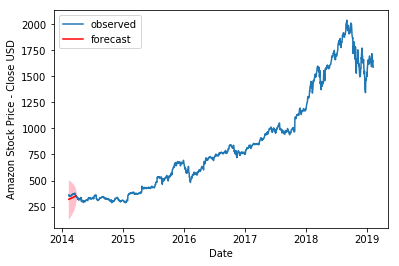

In [51]:
# Plotting predictions
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(confidence_intervals.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Differencing and Fitting ARMA

In [55]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Wed, 02 Oct 2019   AIC                          11079.308
Time:                        21:33:18   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1772      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

### Unrolling ARMA forecast

Trained arma model will be used in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

In [57]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast) 

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    359.999387
1259    360.587838
1260    359.811247
1261    360.403300
1262    359.698675
1263    360.280753
1264    359.633467
1265    360.197681
1266    359.597839
1267    360.139847
dtype: float64


C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### Fitting an ARIMA model (easy way)
- Instead of taking the difference, modeling the difference and then integrating we will just use **statsmodel** that will do the hard work for us

In [58]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    359.999494
1260    360.588017
1261    359.811455
1262    360.403577
1263    359.698926
1264    360.281083
1265    359.633732
1266    360.198039
1267    359.598103
1268    360.140221
dtype: float64


C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### AR or MA : Determine model and thier order
- use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model.
- selecting the right model order is of great importance to our predictions.

|      | AR(p)                   |MA(q)                  |ARMA(p, q)               |
|:----:|:-----------------------:|:---------------------:|:-----------------------:|
| ACF  |Tails off                |Cuts off after lag q   |Tails off                |
| PACF |Cuts off after lag p     |Tails off              |Tails off                |


In [13]:
amazon_diff = amazon.diff(3).dropna()
# amazon_diff

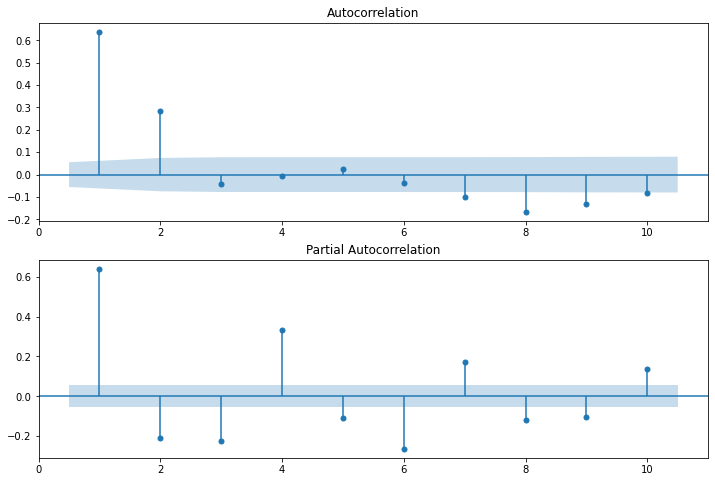

In [14]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(amazon_diff, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(amazon_diff, lags=10, zero=False, ax=ax2)

plt.show()

### Order of earthquakes

- use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.


In [23]:
earthquakes = pd.read_csv('earthquakes.csv')
earthquakes.date = pd.to_datetime(earthquakes.date)
earthquakes= earthquakes.set_index(earthquakes.date)
earthquakes = earthquakes.drop(['date','Year'], axis=1)
earthquakes.shape

(99, 1)

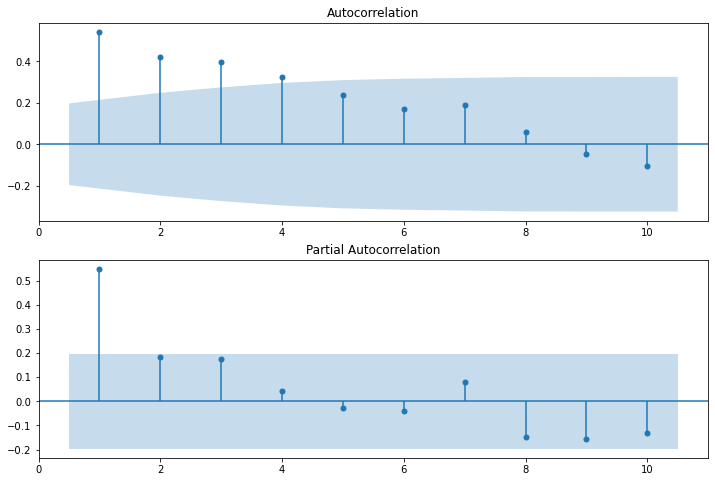

In [21]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(earthquakes, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(earthquakes, lags=10, zero=False, ax=ax2)

plt.show()

##### This is AR(1) model

In [26]:
# Instantiate model
model = SARIMAX(earthquakes,order=(1,0,0))

# Train model
results = model.fit()

results.summary()

C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Fri, 25 Jun 2021   AIC                            666.646
Time:                          20:18:34   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
===================================================================================
Ljung-Box (L1) (Q):                  13.39   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Searching over model order using AIC & BIC
- In order to choose the best order for this model we are going to have to do a search over lots of potential model orders to find the best set.


In [28]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(0, 3):
  # Loop over q values from 0-2
    for q in range(0, 3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(earthquakes, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

##### We built 9 models in just a few seconds!

### Choosing order with AIC and BIC

- Now that we have performed a search over many model orders, we will evaluate our results to find the best model order.


In [29]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values(by='AIC', ascending=True))

# Print order_df in order of increasing BIC
print(order_df.sort_values(by='BIC', ascending=True))

   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892
   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892


##### This time AIC and BIC favored the same model, but this won't always be the case. i,e ARMA(1,1)

### AIC and BIC vs ACF and PACF
- apply an AIC-BIC order search for the earthquakes time series. We decided that this dataset looked like an AR(1) process. We will do a grid search over parameters to see if we get the same results. 


In [33]:
# Loop over p values from 0-2
order_aic_bic=[]
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquakes, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
#             print(p, q, results.aic, results.bic)
            order_aic_bic.append((p, q, results.aic, results.bic))
            
        except:
            print(p, q, None, None)     

C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\E1366134\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

In [34]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values(by='AIC', ascending=True))

# Print order_df in order of increasing BIC
print(order_df.sort_values(by='BIC', ascending=True))

   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892
   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892


##### If we look at our printed results we will see that the AIC and BIC both actually favor an ARMA(1,1) model. This isn't what you predicted from the ACF and PACF but notice that the lag 2-3 PACF values are very close to significant, so the ACF/PACF are close to those of an ARMA(p,q) model.